# 11. 편의추정 실습

김보람  
2023-06-07

> 해당 자료는 전북대학교 이영미 교수님 2023응용통계학 자료임

In [10]:
library(MASS) #lm.ridge 
library(car) #vif

In [16]:
library(glmnet) #Ridge, Lasso

Loading required package: Matrix

Loaded glmnet 4.1-7


# 완전한 다중공선성 (perfect multicollinearity)

## 완전한 다중공산성을 갖는 데이터 생성

In [18]:
gen_perfect_collin_data = function(num_samples = 100) {
     x1 = rnorm(n = num_samples, mean = 80, sd = 10)
     x2 = rnorm(n = num_samples, mean = 70, sd = 5)
     x3 = 2 * x1 + 4 * x2 + 3
     y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)  
    data.frame(y, x1, x2, x3)
    }

-   x1과 x2는 independent

-   x3는 선형결합

In [19]:
set.seed(42)
perfect_collin_data = gen_perfect_collin_data() 
head(perfect_collin_data)

In [20]:
round(cor(perfect_collin_data),4)

In [21]:
perfect_collin_fit = lm(y ~ x1 + x2 + x3, data = perfect_collin_data) 
summary(perfect_collin_fit)

-   p-value값 유의하게 나오고, $R^2$값도 크다.

-   $rank(X)=3$(x3가 x1과 x2의 선형결합으로 이루어진 변수이므로)

-   $\rightarrow (X^TX)^{-1}$값을 구할 수 없으므로 $\hat \beta$값을 구할
    수 없다. 그래서 R에서는 한 개의 변수를 빼고 lm을 돌린다.

In [22]:
fit1 = lm(y ~ x1 + x2, data = perfect_collin_data) 
fit2 = lm(y ~ x1 + x3, data = perfect_collin_data) 
fit3 = lm(y ~ x2 + x3, data = perfect_collin_data)



-   x3는 선형결합으로 이루어진 변수이므로 위 예시에서 두 개의 변수만
    안다는 것은 세 개의 변수를 안다는 것과 동치

In [23]:
summary(fit1)

In [24]:
summary(fit2)

-   $y=\beta_0 + \beta_1x_1 + \beta_2 x_3 + \epsilon$

-   $x_3 = 2x_1+4x_2+3$ 대입

-   $y=\beta_0 +\beta_1x_1 + 2\beta_2x_1 + 4\beta_2 x_2 + 3\beta_2 = (\beta_0 + 3\beta_2)+(\beta_1+2\beta_2)x_1 + 4\beta_2 x_2$

-   계수가 좀 달라지지만 x1과 x2의 식으로 다시 써질 수 있음

In [25]:
summary(fit3)

-   fit1, fit2, fit3의 $R^2$가 다 똑같다. 모형의 적합도가 동일하다.

In [26]:
all.equal(fitted(fit1), fitted(fit2))

In [27]:
all.equal(fitted(fit2), fitted(fit3))

-   `all.equal`: 동일한 함수이냐?

In [28]:
coef(fit1)

In [29]:
coef(fit2)

In [30]:
coef(fit3)

# 완전에 가까운 다중공선성 (approximate multicollinearity)

## 완전에 가까운 다중공선성을 갖는 데이터 생성

In [31]:
gen_almost_collin_data = function(num_samples = 100) {
    x1 = rnorm(n = num_samples, mean = 0, sd = 2)
    x2 = rnorm(n = num_samples, mean = 0, sd = 3)
    x3 = 3*x1 + 1*x2 + rnorm(num_samples, mean=0, sd=0.5)
    y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)  
    data.frame(y, x1, x2, x3)
    }

-   rank(X)=4가 된다. 약간의 noise가 있음

In [34]:
set.seed(42)
almost_collin_data = gen_almost_collin_data() 
head(almost_collin_data)

In [33]:
round(cor(almost_collin_data),3)

In [35]:
m <- lm(y~., almost_collin_data) 

In [36]:
summary(m)

-   모형은 유의하고, $R^2$값도 큰 편

-   설명변수들은 별로 유의하지 않다.(x1과 x3).. 다중공산성이 있기 떄문에

-   위의 fit3와 비교해보면, std.Error값이 많이 커진 것을 볼 수 있음.
    x2의 std.Error값 (0.03 -\> 0.183) x3의 std.Error값 (0.005 -\>
    0.1777)

In [37]:
vif(m)

-   vif\>10 이면 다중공산성이 있다.

-   `Std. Error` 값이 커진다. -\> 불안정해짐. 과녁중앙에서 벗어나게..

`-` y에 noise

In [38]:
set.seed(1000)
noise <- rnorm(n = 100, mean = 0, sd =0.5) 
m_noise <- lm(y+noise~., almost_collin_data) 
summary(m_noise)

In [39]:
round(coef(m),3)

In [40]:
round(coef(m_noise),3)

-   m과 m_noise를 비교해보기

-   다중공산성이 없는 경우와 비교해보았을때, 위 coef의 값은 서로 차이가
    많이 있음

## 다중공선성이 없는 경우 비교

In [41]:
m1 <- lm(y~x1+x2, almost_collin_data)
m1_noise <- lm(y+noise~x1+x2, almost_collin_data)

In [42]:
vif(m1)

In [43]:
round(coef(m1),3)

-   $y$~$x_1+x_2$

In [44]:
round(coef(m1_noise),3)

-   $y+noise$~$x_1+x_2$

-   다중공산성이 없는 경우 noise를 추가해도 회귀계수가 별 차이가 업승ㅁ

$$VIF = \dfrac{1}{1-R_j^2}$$

`-` VIF구하는 식

In [46]:
m_sub <- lm(x3~x1+x2,almost_collin_data)

In [47]:
c33 <- 1/(1-summary(m_sub)$r.sq);c33 ##vif

In [48]:
vif(m)

# 실제 데이터 분석

In [49]:
dt <- data.frame(scale(mtcars)) 
dim(dt)

-   n=32

-   p=10

-   11=p+y=10+1

In [50]:
head(dt)

`-` 연비계산 데이터

\[, 1\] mpg Miles/(US) gallon = `y`

\[, 2\] cyl Number of cylinders

\[, 3\] disp Displacement (cu.in.)

\[, 4\] hp Gross horsepower

\[, 5\] drat Rear axle ratio

\[, 6\] wt Weight (1000 lbs)

\[, 7\] qsec 1/4 mile time

\[, 8\] vs Engine (0 = V-shaped, 1 = straight)

\[, 9\] am Transmission (0 = automatic, 1 = manual)\[,10\] gear Number
of forward gears

\[,11\] carb Number of carburetors

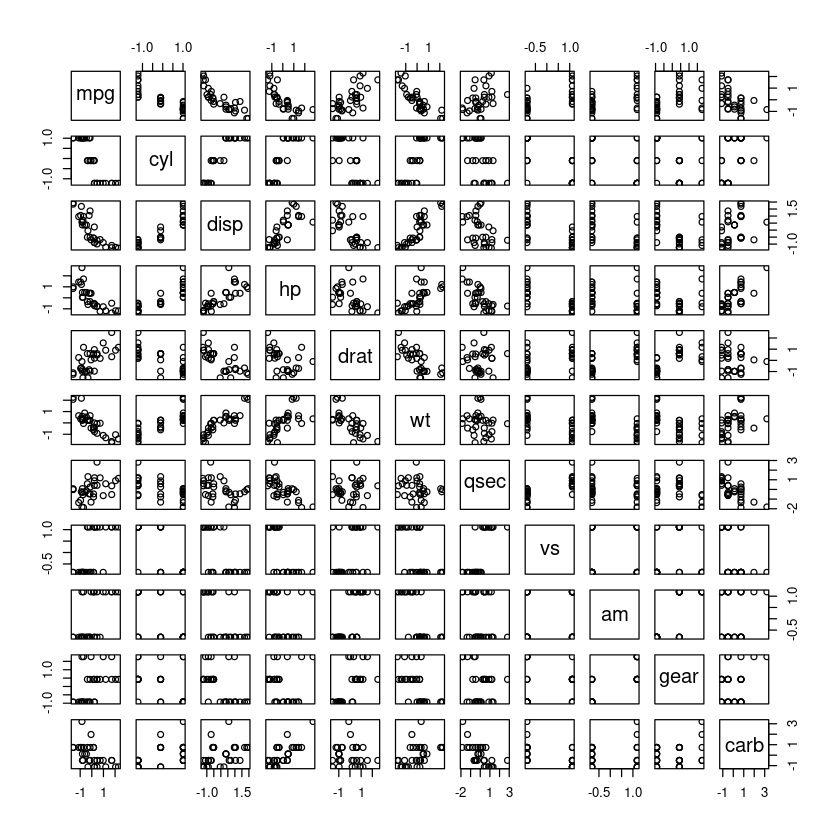

In [51]:
pairs(dt)

In [52]:
round(cor(dt),2)

-   전반적으로 corr이 높음, 다중공산성 생각!

In [53]:
cars_fit_lm <- lm(mpg~., dt) 
summary(cars_fit_lm)

-   모형은 유의하지만 모든 회귀계수가 유의하지 않게 나옴.

-   `p-value`: $H_0:\beta_1=\dots=\beta_10=0$ 한개라도 0이 아닌
    회귀계수가 존재한다는 뜻이지만 회귀계수 보면 엥 없음.

In [54]:
vif(cars_fit_lm)

-   cyl, disp, wt 가 vif값이 높게 나옴.

# 능형회귀 (Ridge Regression)

## lm.ridge 함수 이용

In [55]:
rfit <- lm.ridge(mpg~., dt, lambda=seq(0.01,20,0.1))

-   $\hat\beta(\lambda) = (X^TX+\lambda I_p)^{-1} X^Ty$

-   람다 범위는 0.01~0.1 범위에서 정해줘.

In [56]:
select(rfit) 

modified HKB estimator is 2.58585 
modified L-W estimator is 1.837435 
smallest value of GCV  at 14.91 

-   람다 값 몇개 추전해주는 함수. `smallest value of GCV` 이것을 많이 씀

-   MSE를 가장 작게 하는 $\lambda$값을 찾아줘! GCV

In [57]:
round(rfit$coef[,rfit$lam=='0.21'],3)

-   람다=0.21일 때

In [58]:
round(rfit$coef[,rfit$lam=='3.21'],3)

In [59]:
round(rfit$coef[,rfit$lam=='14.91'],3)

-   $\hat \beta(14.91)$

-   $\hat \beta^{Ridge}(\lambda) = argmin\{\sum \epsilon_i^2\}$

-   $\sum \beta_j^2 \leq t$

-   $min\{\sum \epsilon_i^2 + \lambda \sum \beta_j^2 \}$

`-` 람다의 값이 커질 때, $\sum \hat \beta_j^2$의 계수 값은 작아진다.

In [60]:
sum(rfit$coef[,rfit$lam=='0.21']^2)

-   람다=0.21 일 때 $\sum \hat \beta_j^2$의 계수값

In [61]:
sum(rfit$coef[,rfit$lam=='3.21']^2)

-   람다=3.21 일 때 $\sum \hat \beta_j^2$의 계수값

In [62]:
sum(rfit$coef[,rfit$lam=='14.91']^2)

-   람다=14.91 일 때 $\sum \hat \beta_j^2$의 계수값

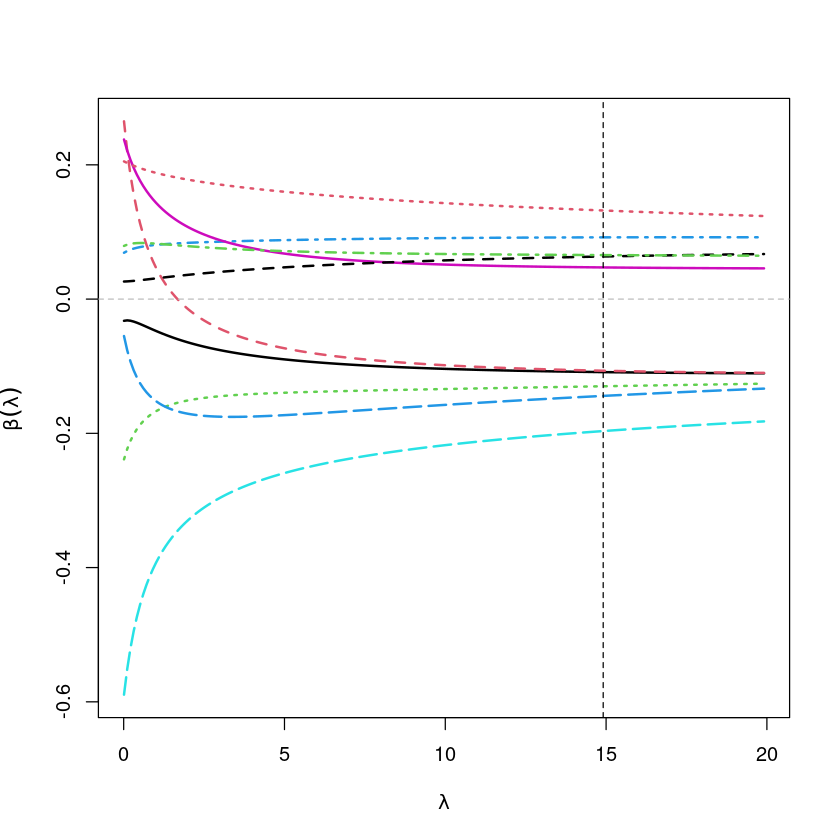

In [65]:
matplot(rfit$lambda, t(rfit$coef), type='l',
        xlab=expression(lambda),
        ylab=expression(bold(beta)(lambda)), lwd=2) 
abline(h=0, col="grey", lty=2)
abline(v=14.91, col="black", lty=2)

## glmnet 함수 이용

-   매트릭스를 만들어 줘야 함!

-   그런데 X하뭇에서 1열은 필요 없음(1 1 1 1 .. 이렇게 되어있는) 그래서
    아래와 같이 \[,-1\]로 X(상수항 빠짐)를 가져옴

In [66]:
X <- model.matrix(mpg~., dt)[,-1] 
y <- dt$mpg

-   X \<- as.matrix(dt\[,-1\]) 해도 같은 결과 나올듯

In [67]:
head(X)

In [69]:
head(y)  #mpg

## Lidge

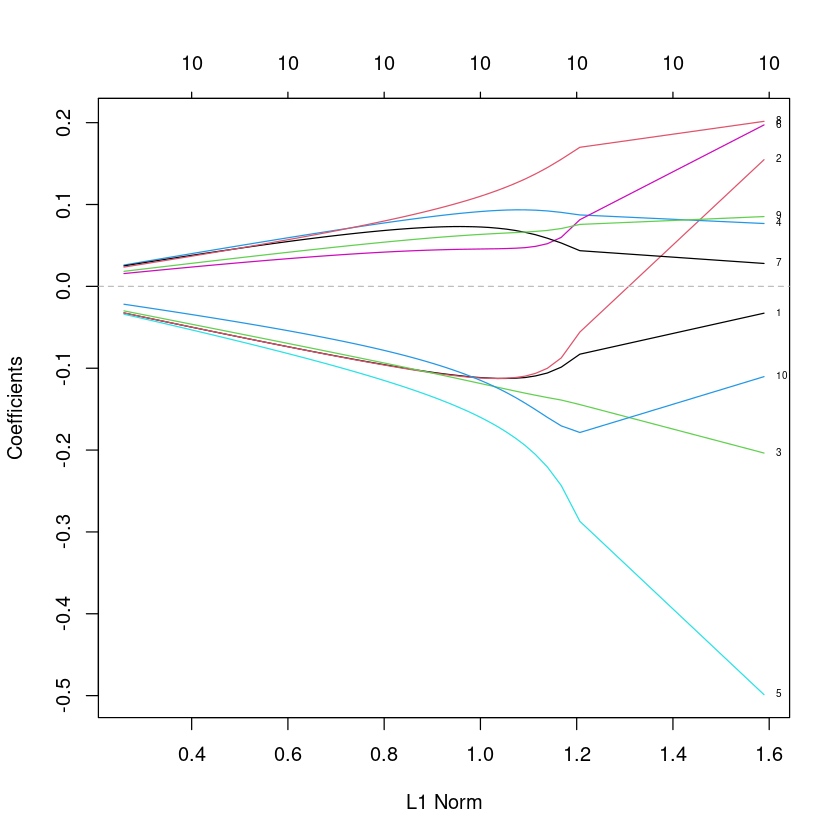

In [70]:
ridge.fit<-glmnet(X,y,alpha=0, lambda=seq(0.01,20,0.1)) ##ridge : alpha=0 
plot(ridge.fit, label=TRUE)
abline(h=0, col="grey", lty=2)

-   위 plot에서 xlabel이 L1 Norm아님. $\sum |\beta_j|$

`-` 최소제곱추정량을 구할 때의 제약 조건

-   릿지 $\sum \beta_j^2 \leq t$ : $L_2$-norm

-   라쏘 $\sum |\beta_j| \leq t$ : $L_1$-norm

-   그런데 릿지 라쏘의 중간 정도를 제약 조건을 주면 어쩔까? 싶어서 나온…

$$(1-\alpha)\sum \beta_j^2 + \alpha \sum|\beta_j| \leq t$$

-   $\alpha=0$이라면 뒷 부분으 날라가니까 $Ridge$를 쓴다는 것이고,
    $\alpha=1$이라면 앞부분 날라가서 $Rasso$를 쓴다는 뜻

`-` 람다를 크게하면서 MSE값이 작아지려면?

`Loocv`

In [73]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=length(y))

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

In [74]:
cv.fit

-   cross validatiom

-   MSE기준으로 람다가 0.4558일때 MSE가 가장 작음

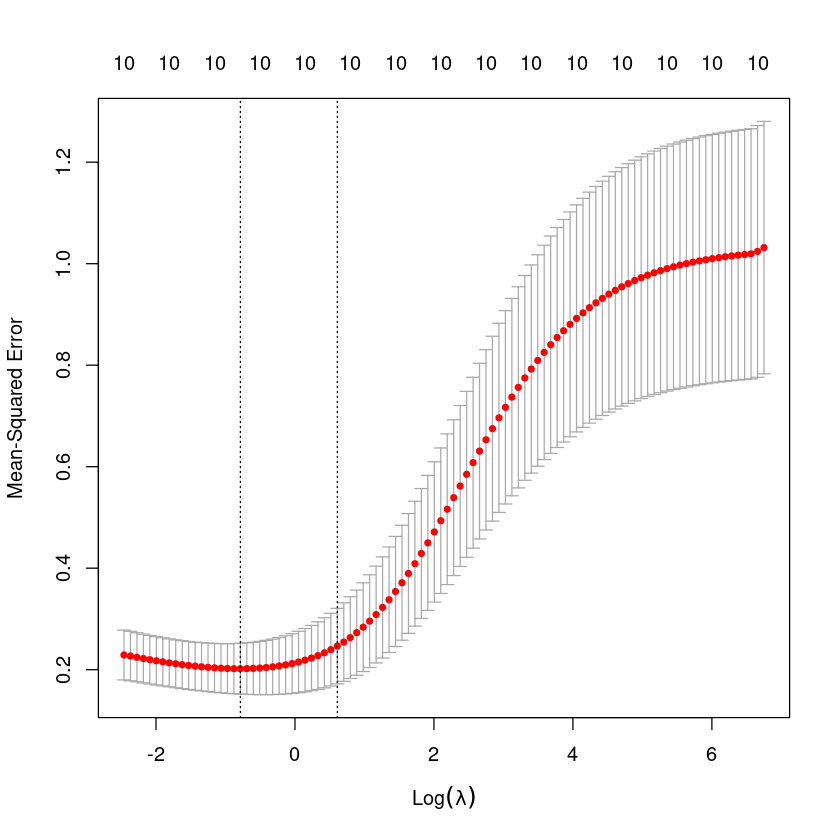

In [75]:
plot(cv.fit)

-   가장 작아지는 값 log(0.4558)=-0.7857

-   log(1.8399)=0.6097

In [76]:
cv.fit<-cv.glmnet(X,y,alpha=0,nfolds=10) 
cv.fit

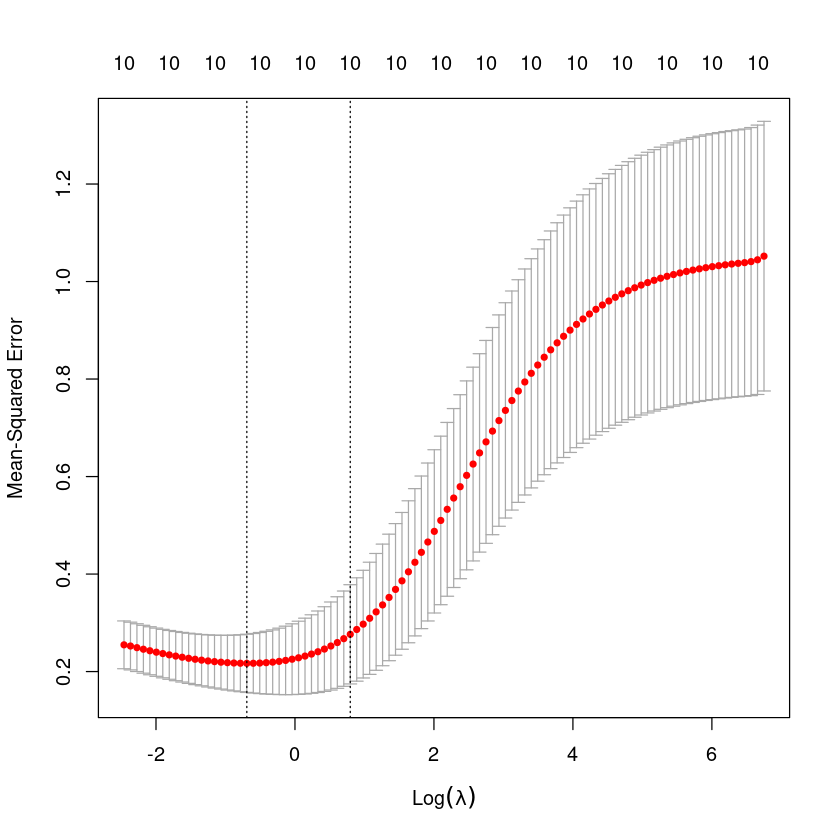

In [77]:
plot(cv.fit)

In [78]:
lam<-cv.fit$lambda.min;lam

In [79]:
log(lam)

`-` $\hat \beta(\lambda)$의 추정량

In [80]:
predict(ridge.fit,type="coefficients",s=lam)

-   옵션 타입을 ‘coefficients’ 주어야 $\hat \beta(\lambda)$의 추정량을
    구할 수 있다.

-   옵션 타입을 ’response’를 쓰게 되면 $\hat y$값을 구할 수 있다.

In [88]:
predict(ridge.fit,type="response",s=lam)

-   `s1`: $\hat \beta (0.5)$

-   $\hat y = X \hat \beta (0.5)$

## Lasso

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”

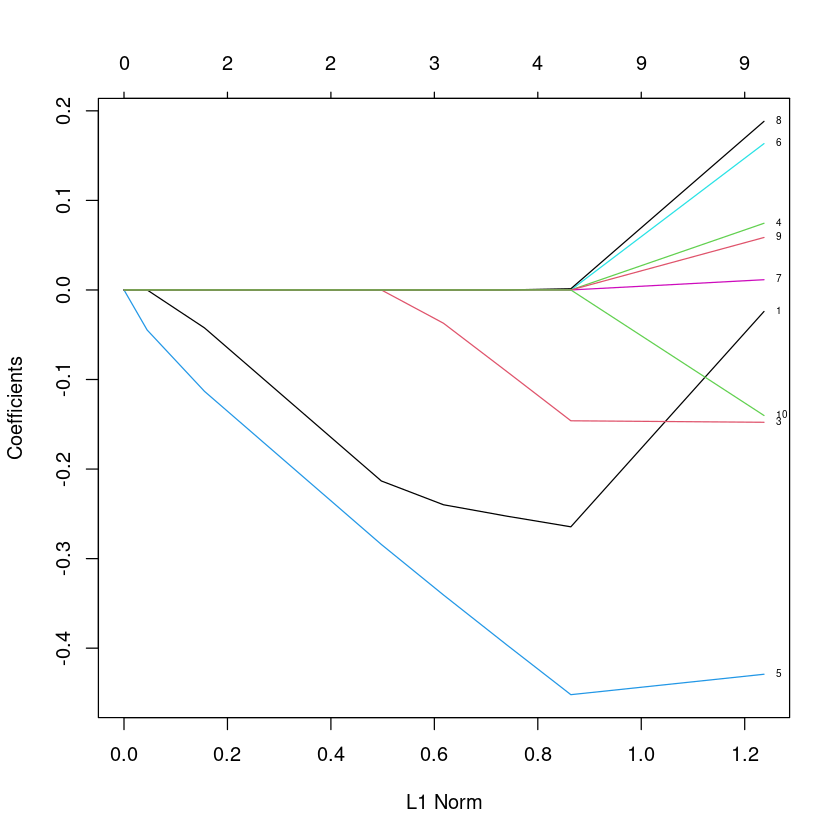

In [81]:
lasso.fit<-glmnet(X,y,alpha=1, lambda=seq(0.01,20,0.1)) ##lasso : alpha=1 
plot(lasso.fit, label=TRUE)

-   8번 보면 가다가 0이 됨. (릿지는 0으로 수렴하긴 했지만 아예 0은
    아니였는데..)

-   제약조건을 걸면 변수를 포기해버림 (9개 -\> 9개 -\> 4개 -\> 3개 -\>
    2개 -\>)

In [82]:
cv.lasso.fit<-cv.glmnet(X,y,alpha=1,nfolds=10) 
cv.lasso.fit

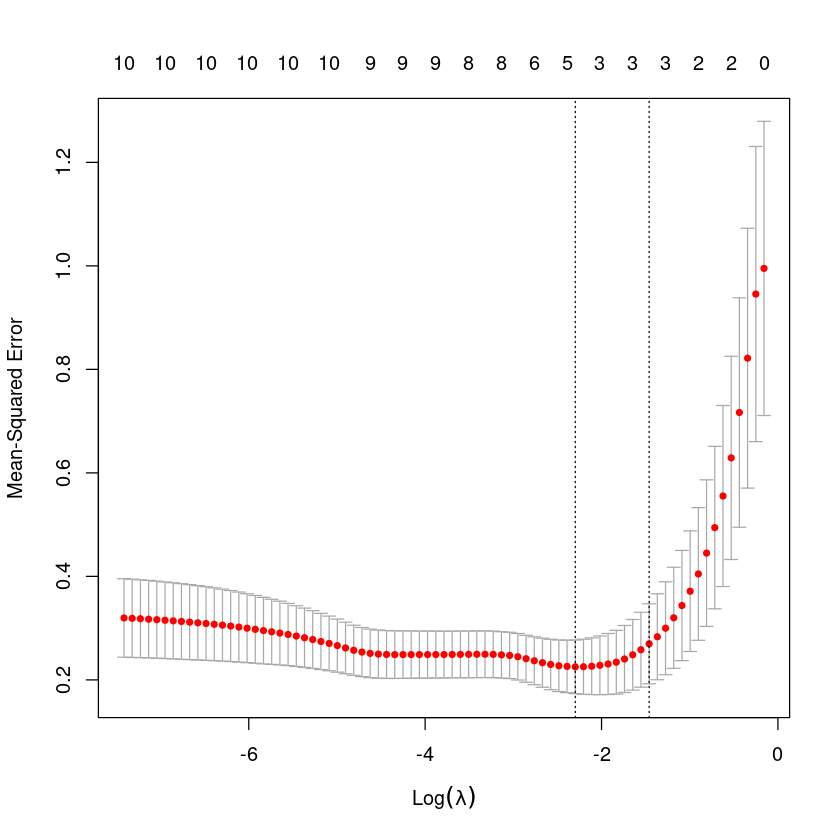

In [83]:
plot(cv.lasso.fit)